In [17]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input

import pydot as plt
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from kt_utils import *

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

## Load dataset from util

In [2]:
x_train_0, y_train_0, x_test_0, y_test_0, classes = load_dataset()


# Normalize image vectors
x_train = x_train_0/255.
x_test = x_test_0/255.

# x_train = x_train_0
# x_test = x_test_0



# Reshape to column vector 
y_train = y_train_0.T
y_test = y_test_0.T

print ("number of training examples = " + str(x_train.shape[0]))
print ("number of test examples = " + str(x_test.shape[0]))
print ("x_train shape: " + str(x_train.shape))
print ("y_train shape: " + str(y_train.shape))
print ("x_test shape: " + str(x_test.shape))
print ("y_test shape: " + str(y_test.shape))

number of training examples = 600
number of test examples = 150
x_train shape: (600, 64, 64, 3)
y_train shape: (600, 1)
x_test shape: (150, 64, 64, 3)
y_test shape: (150, 1)


## Details of the "Happy" dataset:
- Images are of shape (64,64,3)
- Training: 600 pictures
- Test: 150 pictures

It is now time to solve the "Happy" Challenge.

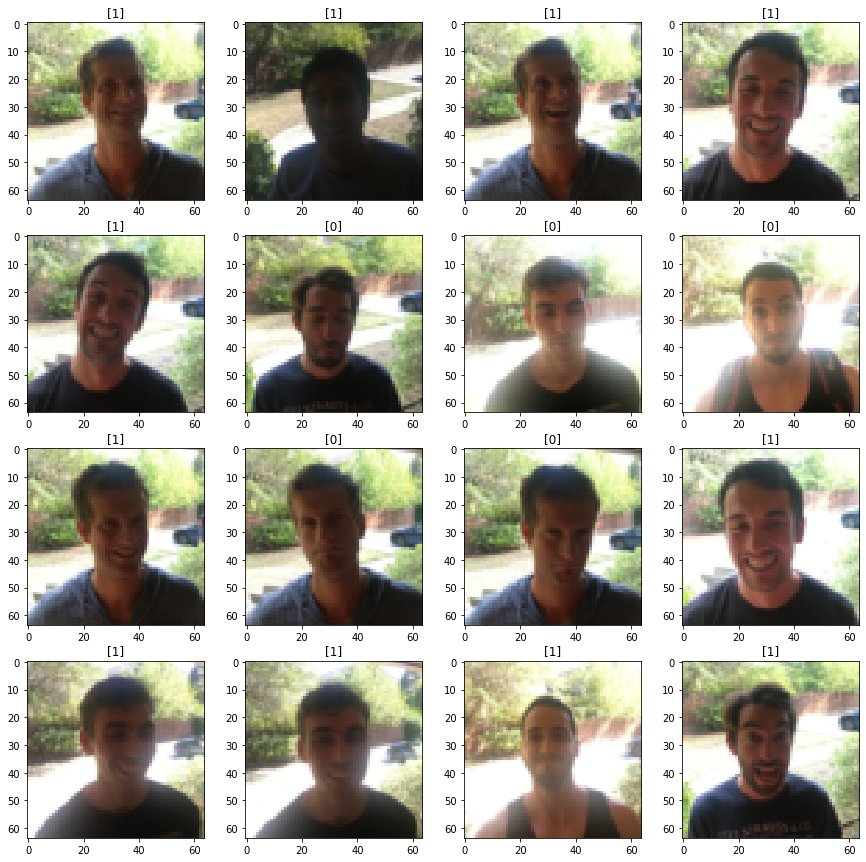

In [3]:
from matplotlib import pyplot as plt


# plot first few images
for i in range(16):
	index = 1 + i

	# define subplot
	plt.subplot(4,4,index)
	# plot raw pixel data
	plt.imshow(x_train[index])
	plt.title(y_train[index])
    
# apply size for all subplot
fig = plt.gcf()
fig.set_size_inches(15,15)


## tf.keras

In [4]:
import tensorflow as tf

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 128)        

In [8]:
from tensorflow.keras.optimizers import RMSprop

# model.compile(optimizer=RMSprop(lr=0.0001),
#               loss='binary_crossentropy',
#               metrics = ['accuracy'])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics = ['accuracy'])


## Image pre-processing

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [10]:
history = model.fit(x_train, y_train,
                    batch_size=50,
                    epochs=50,
                    validation_split=0.2)



Train on 480 samples, validate on 120 samples
Epoch 1/50
480/480 [==============================] - 4s 9ms/sample - loss: 0.6862 - accuracy: 0.5500 - val_loss: 0.6589 - val_accuracy: 0.7250
Epoch 2/50
480/480 [==============================] - 0s 365us/sample - loss: 0.6479 - accuracy: 0.6083 - val_loss: 0.5862 - val_accuracy: 0.8083
Epoch 3/50
480/480 [==============================] - 0s 363us/sample - loss: 0.5799 - accuracy: 0.6771 - val_loss: 0.5334 - val_accuracy: 0.6917
Epoch 4/50
480/480 [==============================] - 0s 364us/sample - loss: 0.4879 - accuracy: 0.7458 - val_loss: 0.4055 - val_accuracy: 0.8250
Epoch 5/50
480/480 [==============================] - 0s 348us/sample - loss: 0.4054 - accuracy: 0.8000 - val_loss: 0.2935 - val_accuracy: 0.8833
Epoch 6/50
480/480 [==============================] - 0s 357us/sample - loss: 0.3608 - accuracy: 0.8333 - val_loss: 0.3686 - val_accuracy: 0.8083
Epoch 7/50
480/480 [==============================] - 0s 340us/sample - loss: 0.

## Evaluate accuracy

In [11]:
test_scores = model.evaluate(x_test, y_test, verbose=1)

print('Test loss:', test_scores[0])
print('Test accuracy:', test_scores[1])


150/150 [==============================] - 0s 2ms/sample - loss: 0.1695 - accuracy: 0.9600
Test loss: 0.16948953588803609
Test accuracy: 0.96


## Plot loss 

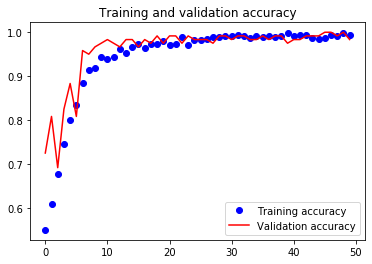

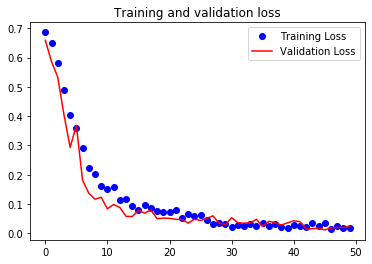

In [12]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history['accuracy' ]
val_acc  = history.history['val_accuracy' ]
loss     = history.history['loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')

plt.title ('Training and validation accuracy')
plt.legend()
plt.show()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')

plt.title ('Training and validation loss'   )
plt.legend()
plt.show()


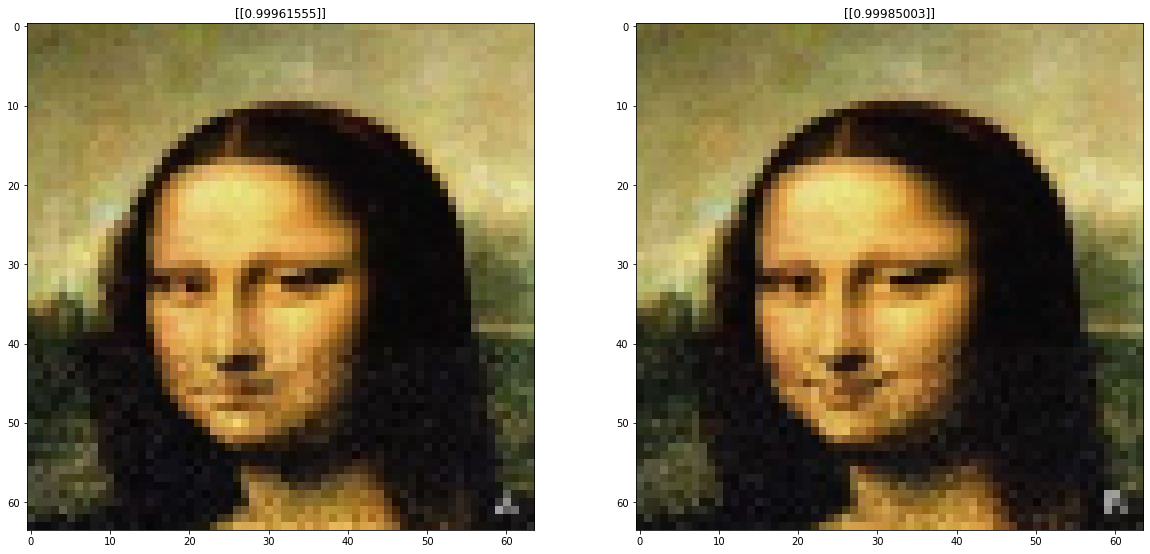

In [18]:
for i in range(2):

    i += 1

    img_path = 'images/m_' + str(i) + '.jpg'
    img = image.load_img(img_path, target_size=(64,64))

    # Image pre-processing 
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    # Normalize image vectors because you train the model with normalized array 
    x = x/255.

    # plot prediction label     
    
    # define subplot
    plt.subplot(1,2,i)
    plt.imshow(img)
    plt.title(str(model.predict(x)))

# apply size for all subplot
fig = plt.gcf()
fig.set_size_inches(20,20)



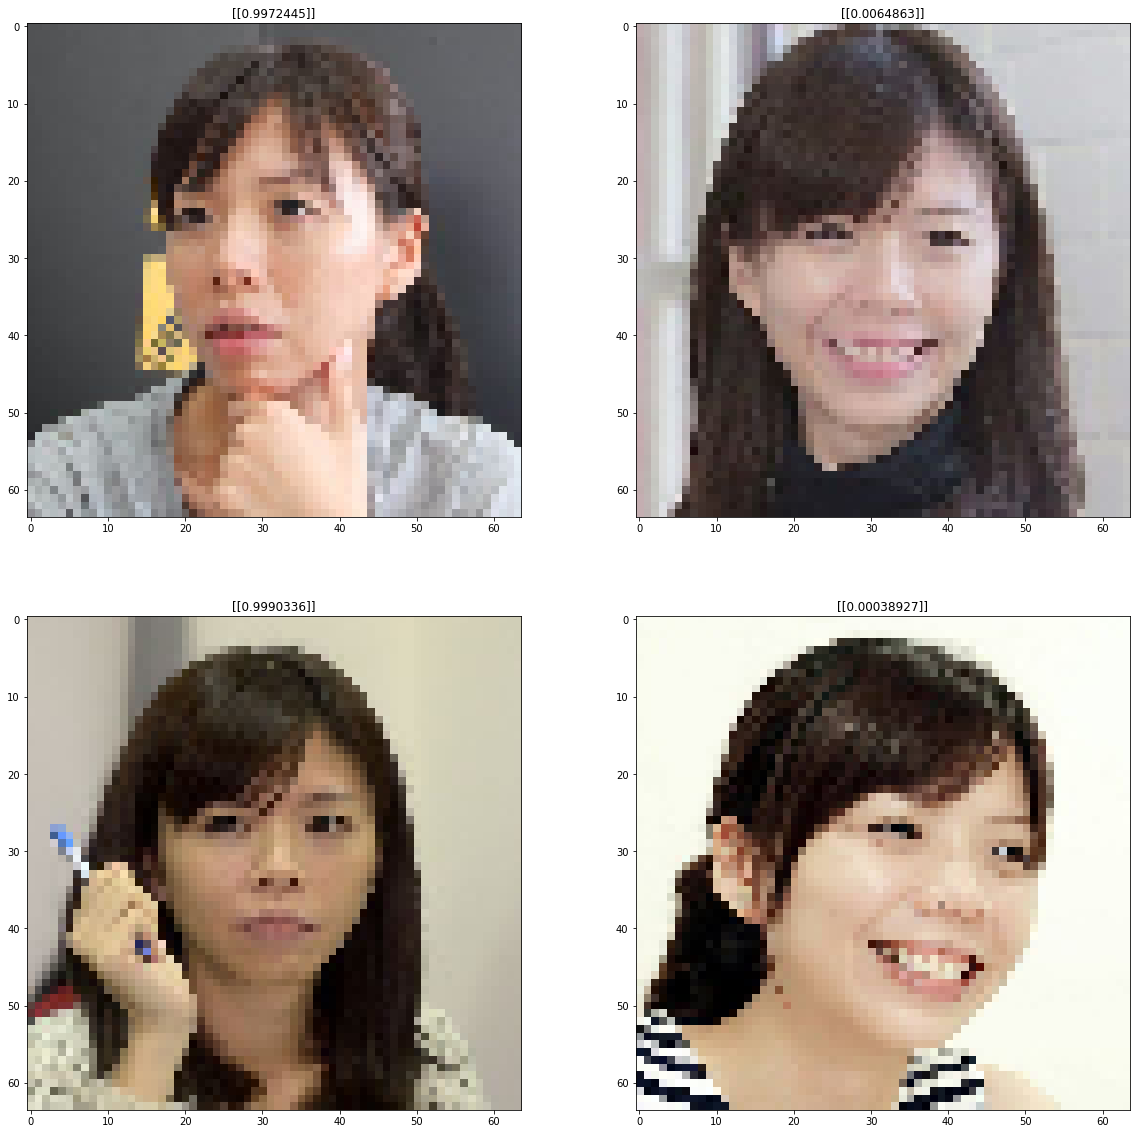

In [19]:
for i in range(4):

    i += 1

    img_path = 'images/' + str(i) + '.jpg'
    img = image.load_img(img_path, target_size=(64,64))

    # Image pre-processing 
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    # Normalize image vectors because you train the model with normalized array 
    x = x/255.

    # plot prediction label     
    
    # define subplot
    plt.subplot(2,2,i)
    plt.imshow(img)
    plt.title(str(model.predict(x)))

# apply size for all subplot
fig = plt.gcf()
fig.set_size_inches(20,20)



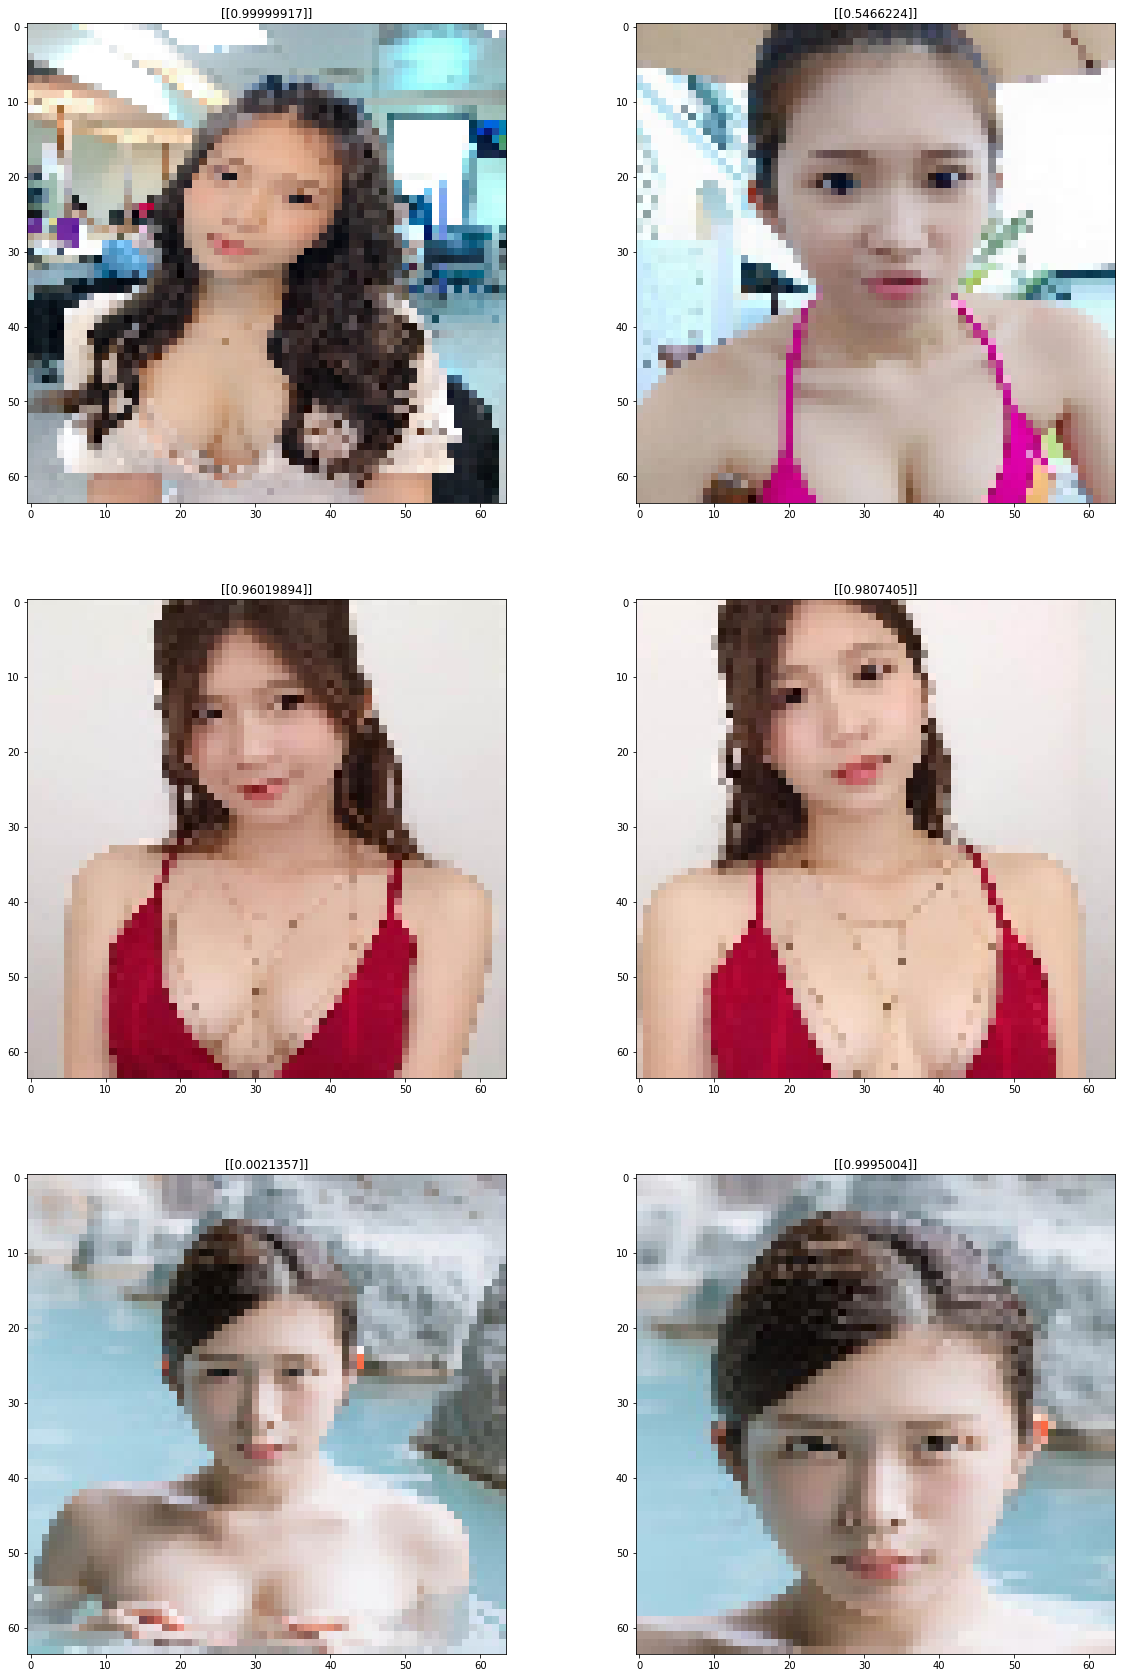

In [20]:
for i in range(6):

    i += 1

    img_path = 'images/ili_' + str(i) + '.jpg'
    img = image.load_img(img_path, target_size=(64,64))

    # Image pre-processing 
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    # Normalize image vectors because you train the model with normalized array 
    x = x/255.

    # plot prediction label     
    
    # define subplot
    plt.subplot(3,2,i)
    plt.imshow(img)
    plt.title(str(model.predict(x)))

# apply size for all subplot
fig = plt.gcf()
fig.set_size_inches(20,30)

